# Timeseries Regresion for Tradeable Factors

In [4]:
from empfin import TimeseriesReg, ff25p, ff5f


We can use this model when all our factor are excess returns. Let us start by reading the Fama-French dataset, the 5 factors and 25 double-sorted portfolios.

In [5]:
ports = ff25p()
facts, _ = ff5f()

Let's start with a **single-factor model**, the market model. For each test asset, we are going to run the following regression

$$
R_{i,t} = \alpha_i + \beta_i R_{mkt,t} + \varepsilon_{i,t}
$$

In [6]:
ts_reg_mkt = TimeseriesReg(
    assets=ports,
    factors=facts["Mkt-RF"],
)

The attribute `params` gives us the estimates for $\alpha$  and $\beta$ for each test asset

In [11]:
ts_reg_mkt.params.T

,alpha,Mkt-RF
ME1 BM1,-0.530624,1.414730
ME1 BM2,0.036171,1.223423
ME1 BM3,0.106458,1.114278
ME1 BM4,0.326794,1.041340
ME1 BM5,0.464062,1.069196
ME2 BM1,-0.280549,1.378227
ME2 BM2,0.074090,1.185572
ME2 BM3,0.216174,1.080903
ME2 BM4,0.281384,1.023522
ME2 BM5,0.305403,1.148715


In the timeseries regression with tradeable factors, the estimate for the risk premium are just the average return of the factor portfolios. They are stored in the `lambdas` attribute.

In [10]:
ts_reg_mkt.lambdas

Mkt-RF    0.590952
dtype: float64

We can run the Gibbons-Ross-Shanken test to evaluate if all alphas are jointly equal to zero.

$$
H_0: \alpha_i = 0 \quad \forall i
$$

In [15]:
grs, pval = ts_reg_mkt.grs_test()
print(f"The GRS stat is {round(grs,4)} with a p-value of {pval}")

The GRS stat is 4.0148 with a p-value of 3.630742373417206e-10


The `TimeseriesReg` class has a summary chart to better visualize the estimates of $\alpha$, $\lambda$ and compare the realized average excess return of the test assets with those predicted by the factor model.

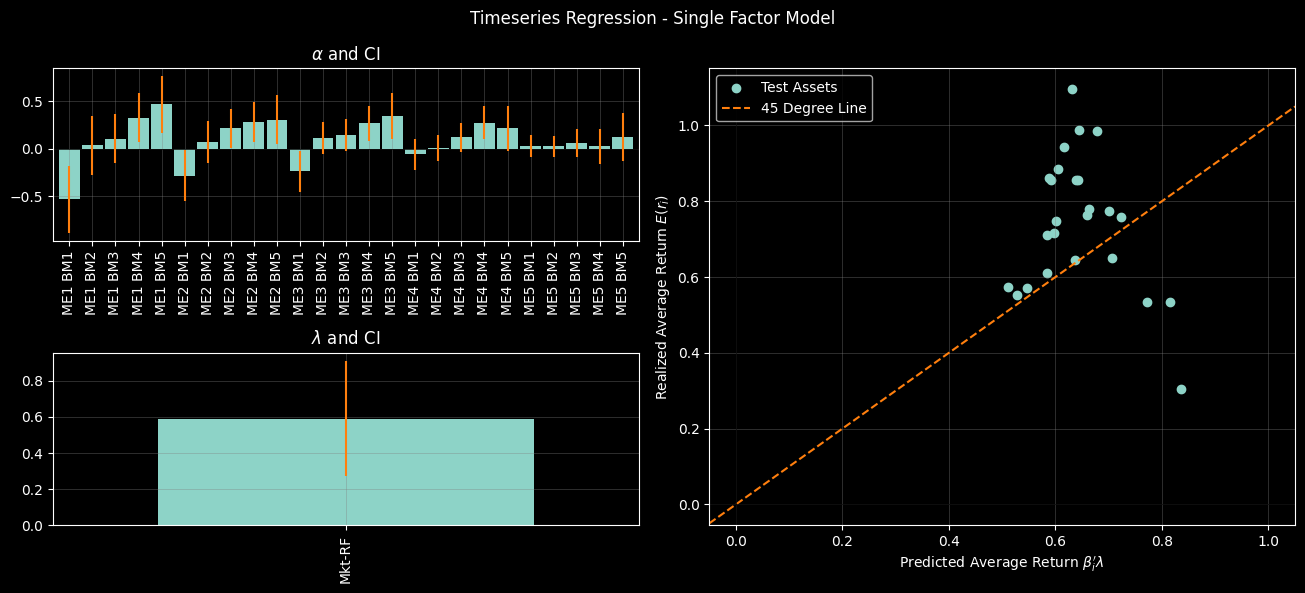

In [12]:
ts_reg_mkt.plot_alpha_pred(title="Timeseries Regression - Single Factor Model")

Now run the same thing, but using the **5 factors** from the Fama-French dataset.

In [16]:
ts_reg_5f = TimeseriesReg(
    assets=ports,
    factors=facts,
)
grs, pval = ts_reg_5f.grs_test()
print(f"The GRS stat is {round(grs,4)} with a p-value of {pval}")

The GRS stat is 2.9158 with a p-value of 3.217920948705988e-06


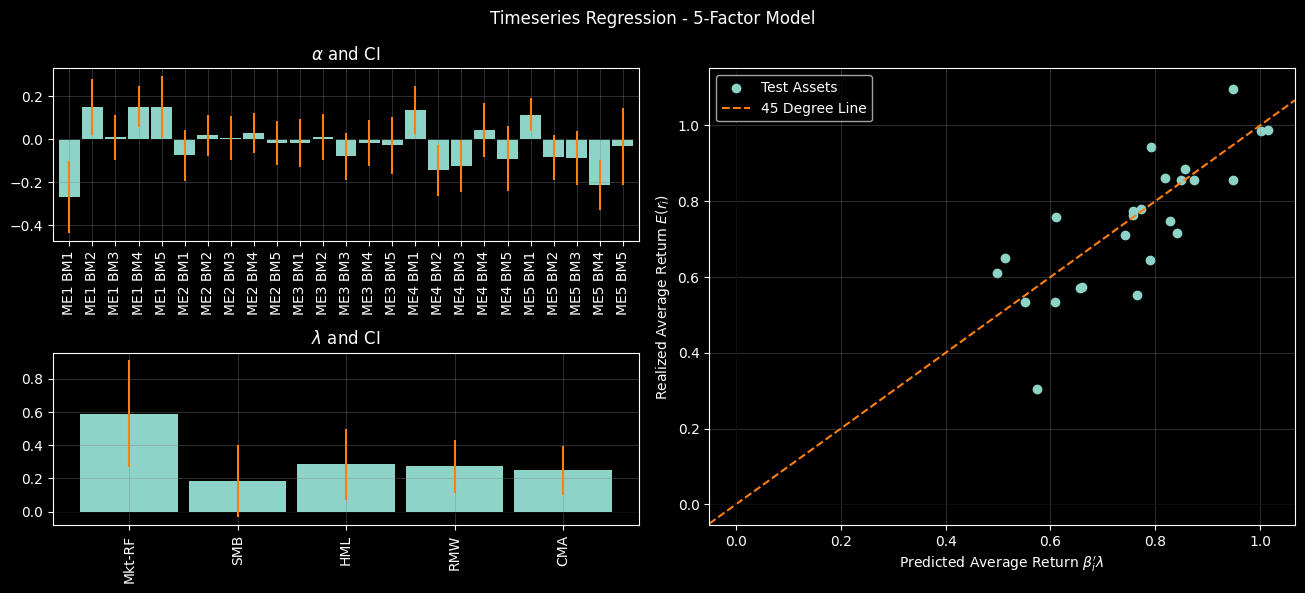

In [17]:
ts_reg_5f.plot_alpha_pred(title="Timeseries Regression - 5-Factor Model")